Casos de isoclinas

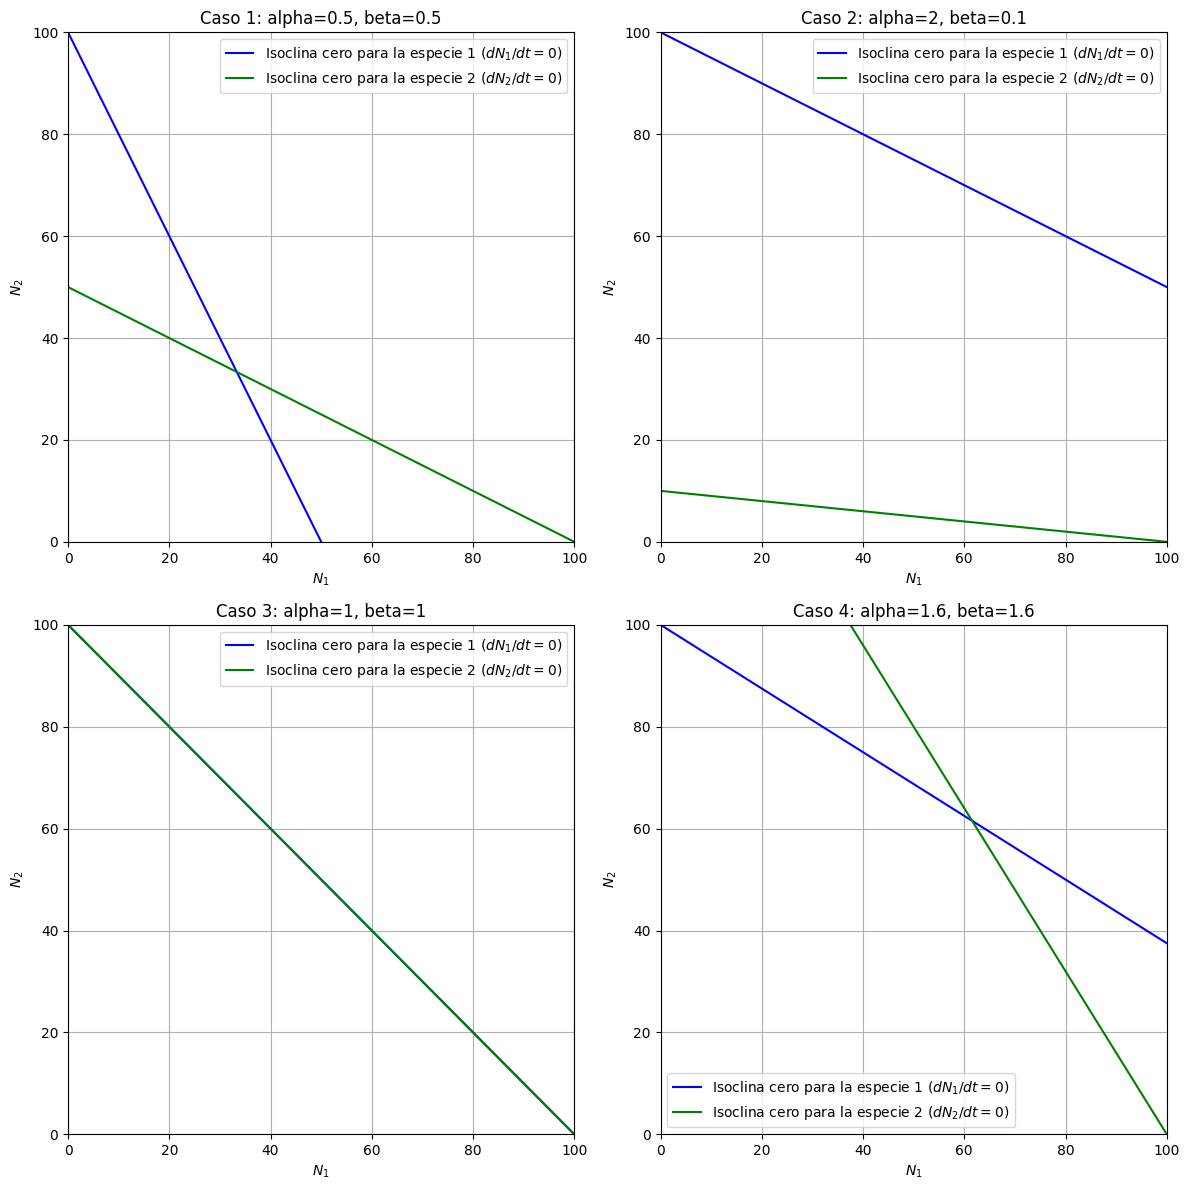

In [37]:
import matplotlib.pyplot as plt
import numpy as np

cases = {
    "Caso 1": {"alpha": 0.5, "beta": 0.5},
    "Caso 2": {"alpha": 2, "beta": 0.1},
    "Caso 3": {"alpha": 1, "beta": 1},
    "Caso 4": {"alpha": 1.6, "beta": 1.6}
}
K1, K2 = 100, 100  

# Define N1 and N2 ranges
N1 = np.linspace(0, K1, 400)
N2 = np.linspace(0, K2, 400)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (Caso, params) in enumerate(cases.items()):
    alpha = params["alpha"]
    beta = params["beta"]
    N2_zero_isocline = K1 - N1 / alpha  # Isoclina cero para la especie 1
    N1_zero_isocline = K2 - N2 / beta  # Isoclina cero para la especie 2
    
    ax = axes[i]
    ax.plot(N1, N2_zero_isocline, label='Isoclina cero para la especie 1 ($dN_1/dt = 0$)', color='blue')
    ax.plot(N1_zero_isocline, N2, label='Isoclina cero para la especie 2 ($dN_2/dt = 0$)', color='green')
    ax.set_xlim(0, K1)
    ax.set_ylim(0, K2)
    ax.set_xlabel('$N_1$')
    ax.set_ylabel('$N_2$')
    ax.set_title(f'{Caso}: alpha={alpha}, beta={beta}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


Casos vistos en el campo vectorial

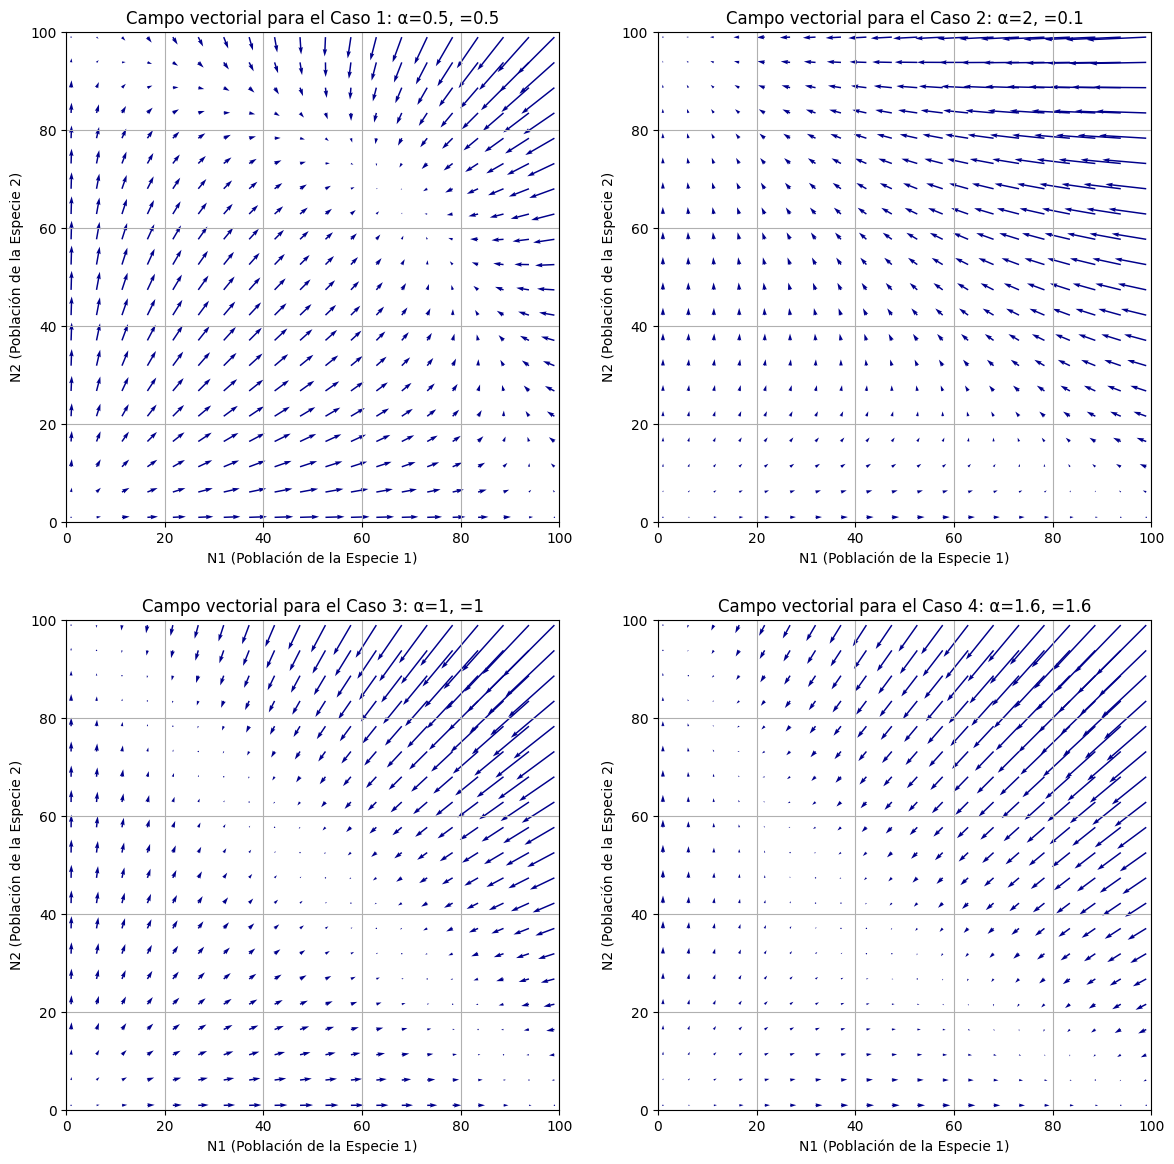

In [38]:
import numpy as np
import matplotlib.pyplot as plt

r1 = r2 = 1
K1 = K2 = 100

N1 = np.linspace(1, 99, 20)
N2 = np.linspace(1, 99, 20)

plt.figure(figsize=(14, 14))

for i, params in enumerate(cases.values()): 
    plt.subplot(2, 2, i + 1)
    N1_grid, N2_grid = np.meshgrid(N1, N2)
    dN1_dt = r1 * N1_grid * (K1 - N1_grid - params['alpha'] * N2_grid) / K1
    dN2_dt = r2 * N2_grid * (K2 - N2_grid - params['beta'] * N1_grid) / K2
    plt.quiver(N1_grid, N2_grid, dN1_dt, dN2_dt, color='darkblue')
    plt.xlabel('N1 (Población de la Especie 1)')
    plt.ylabel('N2 (Población de la Especie 2)')
    plt.title(f'Campo vectorial para el Caso {i + 1}: α={params["alpha"]}, ={params["beta"]}')
    plt.grid(True)
    plt.xlim([0, K1])
    plt.ylim([0, K2])
    
plt.show()
